# Final Project: Sentiment Analysis of 10-K and 10-Q

This project ask you to perform sentiment analysis on 10-K Financial Reports.

1. You are asked to pick 1 firm, download the entire history of 10-K and 10-Q financial reports from the SEC Edgar Server.

2. Perform sentiment analysis on all the 10-K and 10-Q reports.

3. Merge with stock return data.

4. Determine if changes in negative sentiment can predict stock returns.

## Obtain 10-K Financial Reports

In [2]:
pip install -U sec-edgar-downloader

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sec_edgar_downloader import Downloader
dl = Downloader(r"C:\Users\Admin\Desktop\Final Project", "danny01bg@gmail.com")

In [ ]:
dl.get("10-K", "NVDA")
dl.get("10-Q", "NVDA")

#Total 10-Qs and 10Ks documents is 97

75

In [16]:
import os
import re
from pathlib import Path
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Downloading and using these sentiment analysis tools
nltk.download('vader_lexicon')
nltk.download('stopwords')


sid = SentimentIntensityAnalyzer() #Initiazlie VADER sentiment analyzer
stop_words = set(stopwords.words('english')) # Using set of english stopwords

def preprocess_text(text):
    
    # Removing HTML tags
    soup = BeautifulSoup(text, "lxml")
    cleaned_text = soup.get_text(separator=" ")

    # Removing unnecessary characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s,.?!]', '', cleaned_text)

    # Removing stop words
    words = cleaned_text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text.lower()

def analyze_sentiment(text):
    return sid.polarity_scores(text)

def extract_date(text):
    date_match = re.search(r'FILED AS OF DATE:\s+(\d{8})', text) #Getting the exact date to match with stock prices in charts
    if date_match:
        return date_match.group(1)
    else:
        return "Unknown"

def read_and_analyze_reports(report_type):
    reports = []
    base_dir = Path("C:/Users/Admin/Desktop/Final Project/sec-edgar-filings/NVDA")
    report_dir = base_dir / report_type

    for subdir, _, files in os.walk(report_dir):
        for file in files:
            if file == "full-submission.txt":
                file_path = os.path.join(subdir, file)
                print(f"Reading file: {file_path}")
                with open(file_path, 'r', encoding='utf-8') as f:
                    report_text = f.read()
                preprocessed_text = preprocess_text(report_text)
                sentiment = analyze_sentiment(preprocessed_text)
                parent_dir = os.path.basename(subdir)
                
                # Exctracting date from the file content
                report_date = extract_date(report_text)
                
                reports.append((parent_dir, report_date, sentiment))
    
    return reports

def main():
    # Read and analyze reports
    sentiments_10k = read_and_analyze_reports("10-K")
    sentiments_10q = read_and_analyze_reports("10-Q")

    # Creating a dataframe for better visualization
    df_10k = pd.DataFrame(sentiments_10k, columns=['Report_ID', 'Date', 'Sentiment'])
    df_10q = pd.DataFrame(sentiments_10q, columns=['Report_ID', 'Date', 'Sentiment'])

    # Split sentiment dictionary into separate columns
    df_10k = df_10k.join(pd.json_normalize(df_10k['Sentiment'])).drop(columns=['Sentiment'])
    df_10q = df_10q.join(pd.json_normalize(df_10q['Sentiment'])).drop(columns=['Sentiment'])

    # Print results
    print("Sentiment Scores for each 10-K Report:")
    print(df_10k)
    
    print("Sentiment Scores for each 10-Q Report:")
    print(df_10q)

    # Saving the results to CSV files for future use
    base_output_dir = Path("C:/Users/Admin/Desktop/Final Project")
    df_10k.to_csv(base_output_dir / "10k_sentiment_scores.csv", index=False)
    df_10q.to_csv(base_output_dir / "10q_sentiment_scores.csv", index=False)

if __name__ == "__main__":
    main()
    
#This works and I will use these scores for the rest of the assignment, it took over 40 mins to get output!

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001012870-02-002262\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-04-000007\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-05-000008\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-06-000014\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-07-000008\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-08-000011\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-09-000013\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Final Project\sec-edgar-filings\NVDA\10-K\0001045810-10-000006\full-submission.txt
Reading file: C:\Users\Admin\Desktop\Fin

In [4]:
df_10k = pd.read_csv('10k_sentiment_scores.csv')
df_10q = pd.read_csv('10q_sentiment_scores.csv')

# Print the contents
print("Data from 10k_sentiment_scores.csv:")
print(df_10k)

print("\nData from 10q_sentiment_scores.csv:")
print(df_10q)

Data from 10k_sentiment_scores.csv:
               Report_ID      Date    neg    neu    pos  compound
0   0001012870-02-002262  20020514  0.058  0.791  0.151         1
1   0001045810-04-000007  20040329  0.061  0.788  0.151         1
2   0001045810-05-000008  20050322  0.058  0.779  0.163         1
3   0001045810-06-000014  20060316  0.057  0.797  0.146         1
4   0001045810-07-000008  20070316  0.058  0.796  0.146         1
5   0001045810-08-000011  20080321  0.060  0.792  0.148         1
6   0001045810-09-000013  20090313  0.068  0.787  0.145         1
7   0001045810-10-000006  20100318  0.087  0.849  0.064        -1
8   0001045810-11-000015  20110316  0.081  0.847  0.072        -1
9   0001045810-12-000013  20120313  0.046  0.815  0.139         1
10  0001045810-13-000008  20130312  0.033  0.827  0.140         1
11  0001045810-14-000030  20140313  0.035  0.825  0.140         1
12  0001045810-15-000036  20150312  0.037  0.822  0.140         1
13  0001045810-16-000205  20160317  0.03

In [5]:
#Cleaning up date and sorting it out


# Updated files below
df_10k = pd.read_csv('10k_sentiment_scores.csv')
df_10q = pd.read_csv('10q_sentiment_scores.csv')

# Convert 'Date' column to datetime format and format it with dashes
df_10k['Date'] = pd.to_datetime(df_10k['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df_10q['Date'] = pd.to_datetime(df_10q['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

# Sort dataframes by 'Date' column in ascending order
df_10k = df_10k.sort_values(by='Date')
df_10q = df_10q.sort_values(by='Date')

# Saved modified dataframes into new CSV files
df_10k.to_csv('10k_sentiment_scores_updated.csv', index=False)
df_10q.to_csv('10q_sentiment_scores_updated.csv', index=False)

print("Updated files saved successfully.")


Updated files saved successfully.


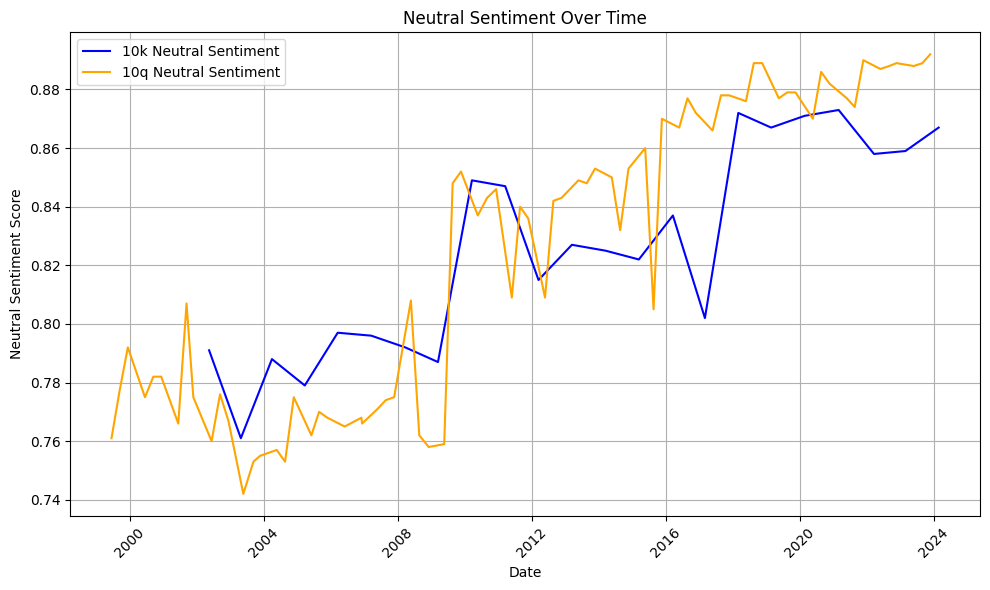

In [6]:
df_10k = pd.read_csv('10k_sentiment_scores_updated.csv')
df_10q = pd.read_csv('10q_sentiment_scores_updated.csv')

df_10k['Date'] = pd.to_datetime(df_10k['Date'])
df_10q['Date'] = pd.to_datetime(df_10q['Date'])


# Plotting 10k and 10q sentiment data 
plt.figure(figsize=(10, 6))
plt.plot(df_10k['Date'], df_10k['neu'], label='10k Neutral Sentiment', color='blue')
plt.plot(df_10q['Date'], df_10q['neu'], label='10q Neutral Sentiment', color='orange')

plt.title('Neutral Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Neutral Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#We see a rise in neutrality over the years 

In [7]:
import yfinance as yf

ticker_symbol = 'NVDA'
nvidia_data = yf.download(ticker_symbol, start="1999-01-01", end="2024-05-25")
nvidia_data.reset_index(inplace=True)

print("Nvidia Stock Data:")
print(nvidia_data.head())

df_10k = pd.read_csv('10k_sentiment_scores.csv')
df_10q = pd.read_csv('10q_sentiment_scores.csv')

# Add a column to identify the type of report
df_10k['Report_Type'] = '10-K'
df_10q['Report_Type'] = '10-Q'

# Convert Date column to datetime format
df_10k['Date'] = pd.to_datetime(df_10k['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df_10q['Date'] = pd.to_datetime(df_10q['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

# Sort dataframes by 'Date' column in ascending order
df_10k = df_10k.sort_values(by='Date')
df_10q = df_10q.sort_values(by='Date')

# Save modified dataframes into new CSV files
df_10k.to_csv('10k_sentiment_scores_updated.csv', index=False)
df_10q.to_csv('10q_sentiment_scores_updated.csv', index=False)

print("Updated sentiment data files saved successfully.")

# Convert 'Date' columns in sentiment data to datetime format
df_10k['Date'] = pd.to_datetime(df_10k['Date'])
df_10q['Date'] = pd.to_datetime(df_10q['Date'])

# Merge the sentiment data
df_sentiment = pd.concat([df_10k, df_10q])

# Convert 'Date' columns in stock data to datetime format
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])

# Merge stock data with sentiment data on 'Date'
merged_data = pd.merge(nvidia_data, df_sentiment, how='left', on='Date')

# Remove rows with NaN values
merged_data_cleaned = merged_data.dropna()

# Display the cleaned merged data
print("Cleaned Merged Data:")
print(merged_data_cleaned.head())

# Save the cleaned merged data to a CSV file
merged_data_cleaned.to_csv('merged_stock_sentiment_data_cleaned.csv', index=False)

print("Cleaned merged data saved successfully.")

#This allows the sentiment data to be matched with exact dates for the stock on its trading day and gives opening/closing prices too 


[*********************100%%**********************]  1 of 1 completed

Nvidia Stock Data:
        Date      Open      High       Low     Close  Adj Close     Volume
0 1999-01-22  0.437500  0.488281  0.388021  0.410156   0.376237  271468800
1 1999-01-25  0.442708  0.458333  0.410156  0.453125   0.415653   51048000
2 1999-01-26  0.458333  0.467448  0.411458  0.417969   0.383404   34320000
3 1999-01-27  0.419271  0.429688  0.395833  0.416667   0.382210   24436800
4 1999-01-28  0.416667  0.419271  0.412760  0.415365   0.381015   22752000
Updated sentiment data files saved successfully.
Cleaned Merged Data:
          Date      Open      High       Low     Close  Adj Close    Volume  \
99  1999-06-15  0.354167  0.356771  0.348958  0.354167   0.324878   4929600   
160 1999-09-10  0.553385  0.559896  0.549479  0.552083   0.506427  16742400   
224 1999-12-10  0.813802  0.817708  0.776042  0.790365   0.725004   9830400   
352 2000-06-14  2.694010  2.708333  2.607096  2.641927   2.423444  27508800   
415 2000-09-13  2.911458  2.966146  2.848958  2.917969   2.676660 

In [8]:
merged_data = pd.merge(nvidia_data, df_sentiment, how='left', on='Date')

# Remove rows with NaN values
merged_data_cleaned = merged_data.dropna()

# Adding the Calculation of the difference between close and open prices to a new file
merged_data_cleaned['Close_Open_Difference'] = merged_data_cleaned['Close'] - merged_data_cleaned['Open']

# Saving the cleaned merged data to a CSV file for future use
merged_data_cleaned.to_csv('merged_stock_sentiment_data_cleaned.csv', index=False)

print("Cleaned merged data saved successfully.")
print(merged_data_cleaned.head())

Cleaned merged data saved successfully.
          Date      Open      High       Low     Close  Adj Close    Volume  \
99  1999-06-15  0.354167  0.356771  0.348958  0.354167   0.324878   4929600   
160 1999-09-10  0.553385  0.559896  0.549479  0.552083   0.506427  16742400   
224 1999-12-10  0.813802  0.817708  0.776042  0.790365   0.725004   9830400   
352 2000-06-14  2.694010  2.708333  2.607096  2.641927   2.423444  27508800   
415 2000-09-13  2.911458  2.966146  2.848958  2.917969   2.676660  23997600   

                Report_ID    neg    neu    pos  compound Report_Type  \
99   0001012870-99-001954  0.057  0.761  0.182    1.0000        10-Q   
160  0000898430-99-003541  0.057  0.777  0.165    1.0000        10-Q   
224  0001012870-99-004592  0.074  0.792  0.134    0.9999        10-Q   
352  0001012870-00-003358  0.081  0.775  0.143    0.9999        10-Q   
415  0001012870-00-004766  0.081  0.782  0.137    0.9999        10-Q   

     Close_Open_Difference  
99                0.000

C:\Users\Admin\AppData\Local\Temp\ipykernel_7932\3045700790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_Open_Difference'] = merged_data_cleaned['Close'] - merged_data_cleaned['Open']


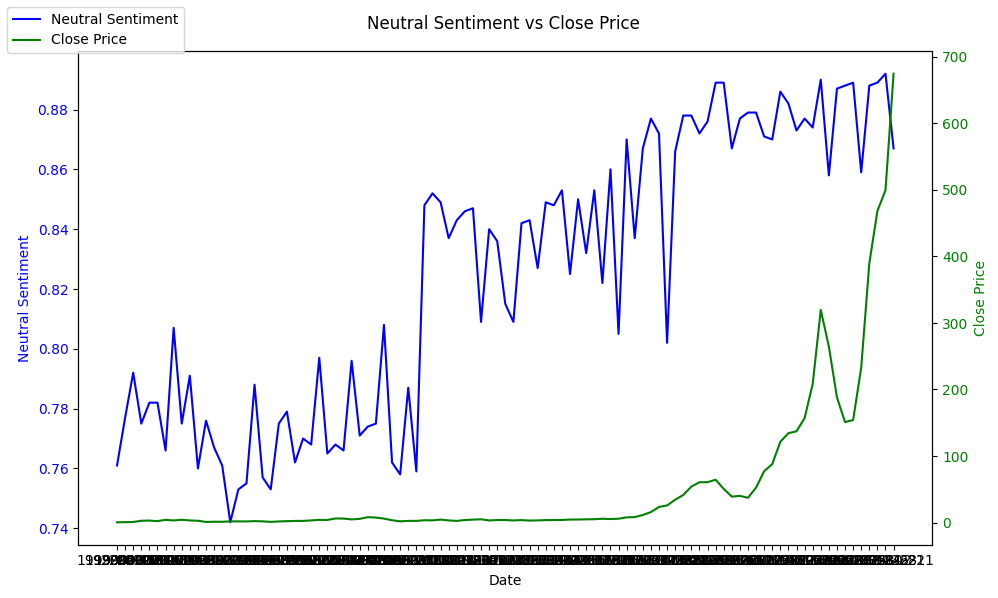

Correlation between 'neu' and 'Close': 0.49536345856624525


In [9]:
# Load the cleaned merged data
merged_data_cleaned = pd.read_csv('merged_stock_sentiment_data_cleaned.csv')

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting 'neu' on the primary y-axis
ax1.plot(merged_data_cleaned['Date'], merged_data_cleaned['neu'], label='Neutral Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Neutral Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for 'Close' prices
ax2 = ax1.twinx()
ax2.plot(merged_data_cleaned['Date'], merged_data_cleaned['Close'], label='Close Price', color='green')
ax2.set_ylabel('Close Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding title and legend
fig.suptitle('Neutral Sentiment vs Close Price')
fig.legend(loc='upper left')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Calculate correlation between 'neu' and 'Close'
correlation = merged_data_cleaned['neu'].corr(merged_data_cleaned['Close'])

print("Correlation between 'neu' and 'Close':", correlation)

#An interesting chart but not very supportive for my project

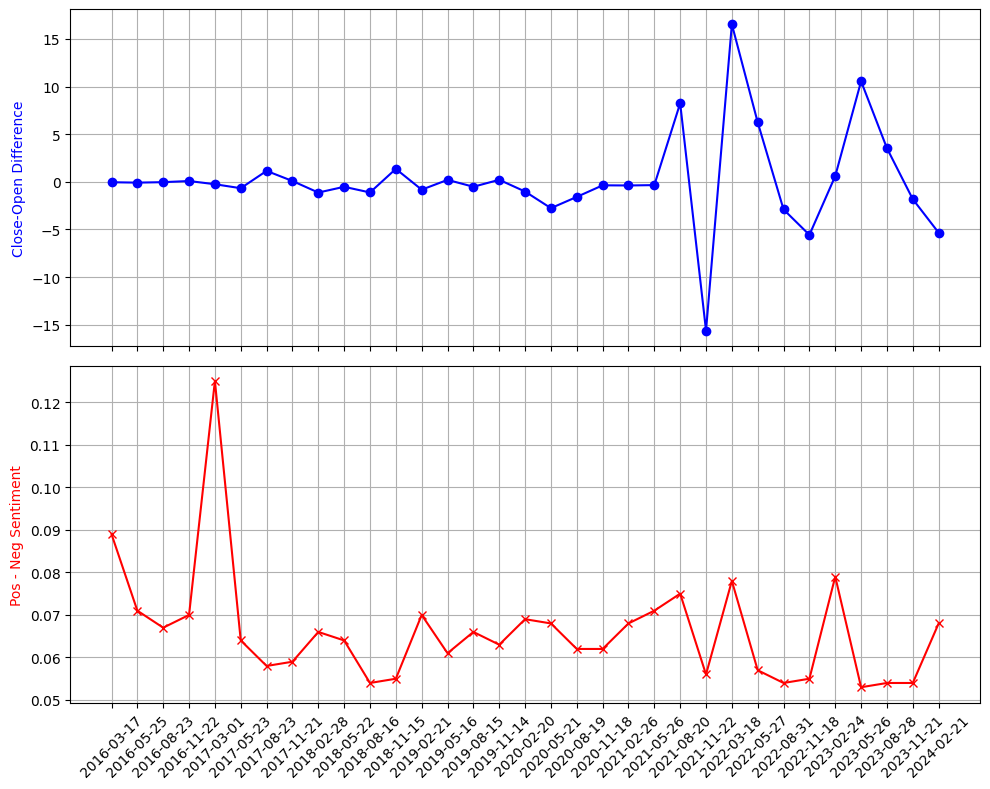

Correlation between Close-Open Difference and Pos-Neg Sentiment Difference: 0.12353622445695446


In [34]:
# Filter data for 2016 onwards since this is when I felt that Nvidia was becoming more active and bigger as a stock over time
filtered_data = merged_data_cleaned[merged_data_cleaned['Date'] >= '2016-01-01']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Close-Open Difference
ax1.plot(filtered_data['Date'], filtered_data['Close_Open_Difference'], marker='o', linestyle='-', color='blue')
ax1.set_ylabel('Close-Open Difference', color='blue')
ax1.grid(True)

# Plot Pos-Neg Sentiment Difference
ax2.plot(filtered_data['Date'], filtered_data['pos'] - filtered_data['neg'], marker='x', linestyle='-', color='red')
ax2.set_ylabel('Pos - Neg Sentiment', color='red')
ax2.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

correlation = filtered_data['Close_Open_Difference'].corr(filtered_data['pos'] - filtered_data['neg'])

# Print correlation coefficient
print("Correlation between Close-Open Difference and Pos-Neg Sentiment Difference:", correlation)


In [28]:
# Calculate percentage difference of the stock price
merged_data_cleaned['Close_Open_Percentage_Difference'] = ((merged_data_cleaned['Close'] - merged_data_cleaned['Open']) / merged_data_cleaned['Open']) * 100

# Calculate percentage difference of sentiment analysis
merged_data_cleaned['Pos_Neg_Percentage_Difference'] = ((merged_data_cleaned['pos'] - merged_data_cleaned['neg']) / merged_data_cleaned['neg']) * 100

# Print the updated DataFrame
print(merged_data_cleaned.head())


         Date      Open      High       Low     Close  Adj Close    Volume  \
0  1999-06-15  0.354167  0.356771  0.348958  0.354167   0.324878   4929600   
1  1999-09-10  0.553385  0.559896  0.549479  0.552083   0.506427  16742400   
2  1999-12-10  0.813802  0.817708  0.776042  0.790365   0.725004   9830400   
3  2000-06-14  2.694010  2.708333  2.607096  2.641927   2.423444  27508800   
4  2000-09-13  2.911458  2.966146  2.848958  2.917969   2.676660  23997600   

              Report_ID    neg    neu  ...  10_days_cumulative_return  \
0  0001012870-99-001954  0.057  0.761  ...                        NaN   
1  0000898430-99-003541  0.057  0.777  ...                        NaN   
2  0001012870-99-004592  0.074  0.792  ...                        NaN   
3  0001012870-00-003358  0.081  0.775  ...                        NaN   
4  0001012870-00-004766  0.081  0.782  ...                        NaN   

   1_month_cumulative_return Future_Close_5d   Return_5d  Future_Close_10d  \
0             

In [14]:
# Extract sentiment scores
neg_scores = merged_data_cleaned['neg']
neu_scores = merged_data_cleaned['neu']
pos_scores = merged_data_cleaned['pos']

# Calculate statistics
neg_mean = np.mean(neg_scores)
neg_std = np.std(neg_scores)
neg_min = np.min(neg_scores)
neg_max = np.max(neg_scores)

neu_mean = np.mean(neu_scores)
neu_std = np.std(neu_scores)
neu_min = np.min(neu_scores)
neu_max = np.max(neu_scores)

pos_mean = np.mean(pos_scores)
pos_std = np.std(pos_scores)
pos_min = np.min(pos_scores)
pos_max = np.max(pos_scores)

# Format and print results
print("Negative Sentiment:")
print("Mean:", "{:.2%}".format(neg_mean))
print("Standard Deviation:", "{:.2%}".format(neg_std))
print("Minimum:", "{:.2%}".format(neg_min))
print("Maximum:", "{:.2%}".format(neg_max))

print("\nNeutral Sentiment:")
print("Mean:", "{:.2%}".format(neu_mean))
print("Standard Deviation:", "{:.2%}".format(neu_std))
print("Minimum:", "{:.2%}".format(neu_min))
print("Maximum:", "{:.2%}".format(neu_max))

print("\nPositive Sentiment:")
print("Mean:", "{:.2%}".format(pos_mean))
print("Standard Deviation:", "{:.2%}".format(pos_std))
print("Minimum:", "{:.2%}".format(pos_min))
print("Maximum:", "{:.2%}".format(pos_max))

print()

# Get the index corresponding to the min and max sentiment scores
neg_min_index = neg_scores.idxmin()
neg_max_index = neg_scores.idxmax()

neu_min_index = neu_scores.idxmin()
neu_max_index = neu_scores.idxmax()

pos_min_index = pos_scores.idxmin()
pos_max_index = pos_scores.idxmax()

# Getting the exact dates for the min and max sentiment scores
neg_min_date = merged_data_cleaned.loc[neg_min_index, 'Date']
neg_max_date = merged_data_cleaned.loc[neg_max_index, 'Date']

neu_min_date = merged_data_cleaned.loc[neu_min_index, 'Date']
neu_max_date = merged_data_cleaned.loc[neu_max_index, 'Date']

pos_min_date = merged_data_cleaned.loc[pos_min_index, 'Date']
pos_max_date = merged_data_cleaned.loc[pos_max_index, 'Date']

# Print the dates
print("Negative Sentiment:")
print("Date for Minimum:", neg_min_date)
print("Date for Maximum:", neg_max_date)

print("\nNeutral Sentiment:")
print("Date for Minimum:", neu_min_date)
print("Date for Maximum:", neu_max_date)

print("\nPositive Sentiment:")
print("Date for Minimum:", pos_min_date)
print("Date for Maximum:", pos_max_date)

Negative Sentiment:
Mean: 5.25%
Standard Deviation: 2.31%
Minimum: 2.40%
Maximum: 9.20%

Neutral Sentiment:
Mean: 82.49%
Standard Deviation: 4.69%
Minimum: 74.20%
Maximum: 89.20%

Positive Sentiment:
Mean: 12.26%
Standard Deviation: 3.26%
Minimum: 6.00%
Maximum: 18.50%

Negative Sentiment:
Date for Minimum: 2013-08-21
Date for Maximum: 2010-05-21

Neutral Sentiment:
Date for Minimum: 2003-05-22
Date for Maximum: 2023-11-21

Positive Sentiment:
Date for Minimum: 2009-11-19
Date for Maximum: 2003-04-25


[*********************100%%**********************]  1 of 1 completed

Correlation between negative sentiment and stock returns: 0.18444467470648698
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.346
Date:                Wed, 29 May 2024   Prob (F-statistic):             0.0705
Time:                        02:48:46   Log-Likelihood:                 180.69
No. Observations:                  97   AIC:                            -357.4
Df Residuals:                      95   BIC:                            -352.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

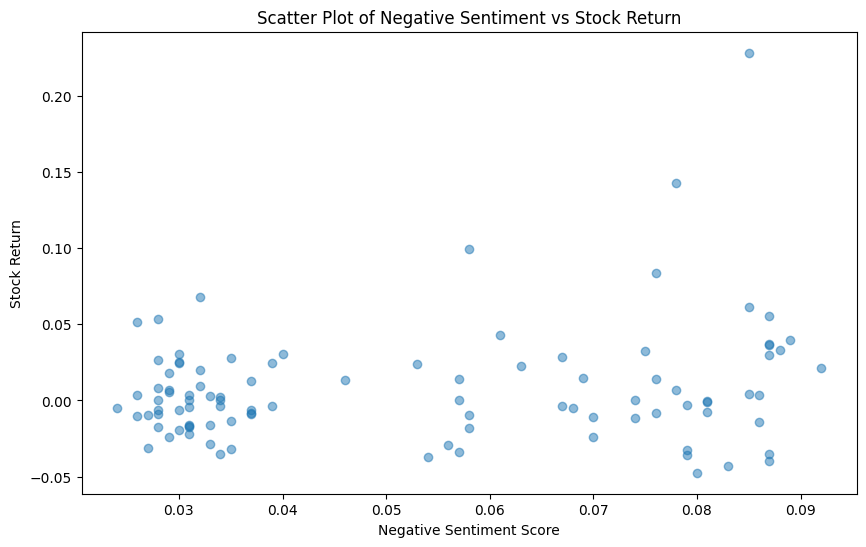

In [17]:
df_10k = pd.read_csv("C:/Users/Admin/Desktop/Final Project/10k_sentiment_scores.csv")
df_10q = pd.read_csv("C:/Users/Admin/Desktop/Final Project/10q_sentiment_scores.csv")
df_sentiment = pd.concat([df_10k, df_10q])

# Download historical stock prices for Nvidia (NVDA)
nvda = yf.download('NVDA', start='1999-01-22', end='2024-12-31')
nvda['Return'] = nvda['Adj Close'].pct_change()

# Convert dates to match the filing dates in sentiment data and merge both
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'], format='%Y%m%d')
df_merged = pd.merge(df_sentiment, nvda[['Return']], left_on='Date', right_index=True, how='inner')

# Simple correlation analysis
correlation = df_merged['neg'].corr(df_merged['Return'])
print(f"Correlation between negative sentiment and stock returns: {correlation}")

# Regression analysis
X = df_merged['neg']
y = df_merged['Return']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
print(model.summary())


plt.figure(figsize=(10, 6))
plt.scatter(df_merged['neg'], df_merged['Return'], alpha=0.5)
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Stock Return')
plt.title('Scatter Plot of Negative Sentiment vs Stock Return')
plt.show()

#Regression model and correlation does not appear useful so it will not be presented

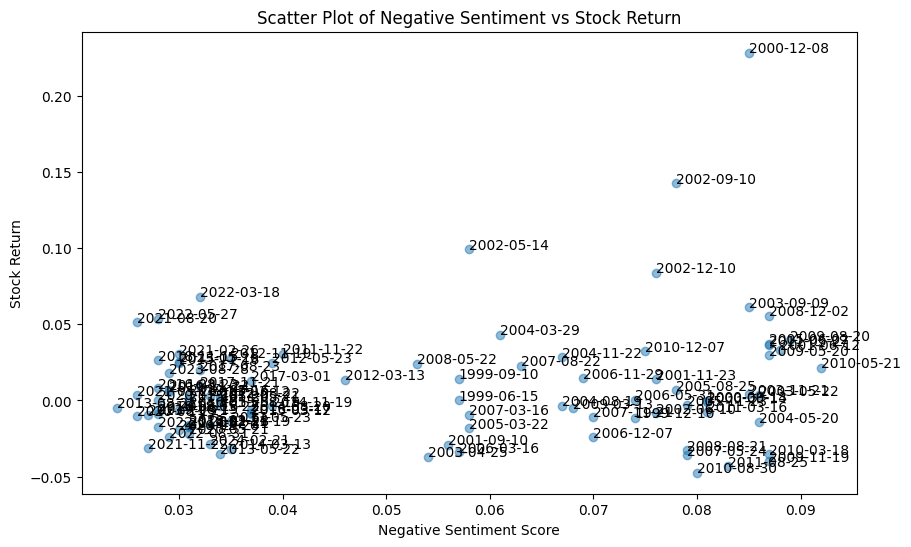

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['neg'], df_merged['Return'], alpha=0.5)
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Stock Return')
plt.title('Scatter Plot of Negative Sentiment vs Stock Return')

# Reset index to ensure consistent indexing
df_merged_reset = df_merged.reset_index(drop=True)

# Annotate each point with its corresponding date, increasing fontsize for better visibility
for i, date in enumerate(df_merged_reset['Date']):
    plt.annotate(date.strftime('%Y-%m-%d'), (df_merged_reset['neg'][i], df_merged_reset['Return'][i]), fontsize=10)

plt.show()

#Just tested aroud to get the dates for each data point

## Analysis 

* Run tests to examine whether changes in sentiment predicts future stock returns.

    * Cumulative 5 days, 10 days, 1 month returns
    
    * Negative sentiment vs positive sentiment vs overall sentiment
        

In [24]:
# Calculating daily returns
merged_data_cleaned['Daily_Return'] = merged_data_cleaned['Adj Close'].pct_change()

# Calculating cumulative returns for different periods of time
merged_data_cleaned['5_days_cumulative_return'] = merged_data_cleaned['Daily_Return'].rolling(window=5).sum()
merged_data_cleaned['10_days_cumulative_return'] = merged_data_cleaned['Daily_Return'].rolling(window=10).sum()
merged_data_cleaned['1_month_cumulative_return'] = merged_data_cleaned['Daily_Return'].rolling(window=20).sum()  # Assuming 1 month = 20 trading days

print(merged_data_cleaned)

          Date        Open        High         Low       Close   Adj Close  \
0   1999-06-15    0.354167    0.356771    0.348958    0.354167    0.324878   
1   1999-09-10    0.553385    0.559896    0.549479    0.552083    0.506427   
2   1999-12-10    0.813802    0.817708    0.776042    0.790365    0.725004   
3   2000-06-14    2.694010    2.708333    2.607096    2.641927    2.423444   
4   2000-09-13    2.911458    2.966146    2.848958    2.917969    2.676660   
..         ...         ...         ...         ...         ...         ...   
92  2023-02-24  232.250000  234.740005  229.470001  232.860001  232.745819   
93  2023-05-26  378.899994  391.700012  375.500000  389.459991  389.335114   
94  2023-08-28  464.820007  469.799988  448.880005  468.350006  468.248291   
95  2023-11-21  501.260010  505.170013  492.220001  499.440002  499.372650   
96  2024-02-21  680.059998  688.880005  662.479980  674.719971  674.688293   

      Volume             Report_ID    neg    neu    pos  compou

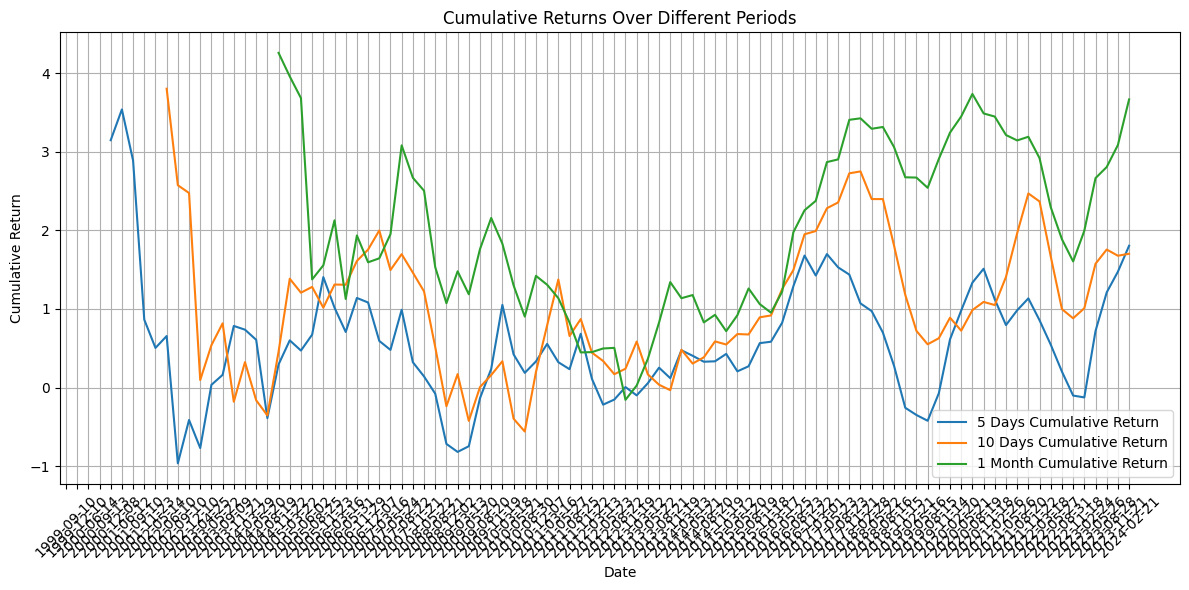

In [25]:
# Plotting the Cumulative 5 days, 10 days, 1 month returns
plt.figure(figsize=(12, 6))


plt.plot(merged_data_cleaned['Date'], merged_data_cleaned['5_days_cumulative_return'], label='5 Days Cumulative Return')
plt.plot(merged_data_cleaned['Date'], merged_data_cleaned['10_days_cumulative_return'], label='10 Days Cumulative Return')
plt.plot(merged_data_cleaned['Date'], merged_data_cleaned['1_month_cumulative_return'], label='1 Month Cumulative Return')


plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns Over Different Periods')
plt.legend()


plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Matrix:
                               Pos_Neg_Percentage_Difference  Return_5d  \
Pos_Neg_Percentage_Difference                       1.000000   0.277939   
Return_5d                                           0.277939   1.000000   
Return_10d                                          0.472125   0.564374   
Return_20d                                          0.747455   0.356165   

                               Return_10d  Return_20d  
Pos_Neg_Percentage_Difference    0.472125    0.747455  
Return_5d                        0.564374    0.356165  
Return_10d                       1.000000    0.616904  
Return_20d                       0.616904    1.000000  


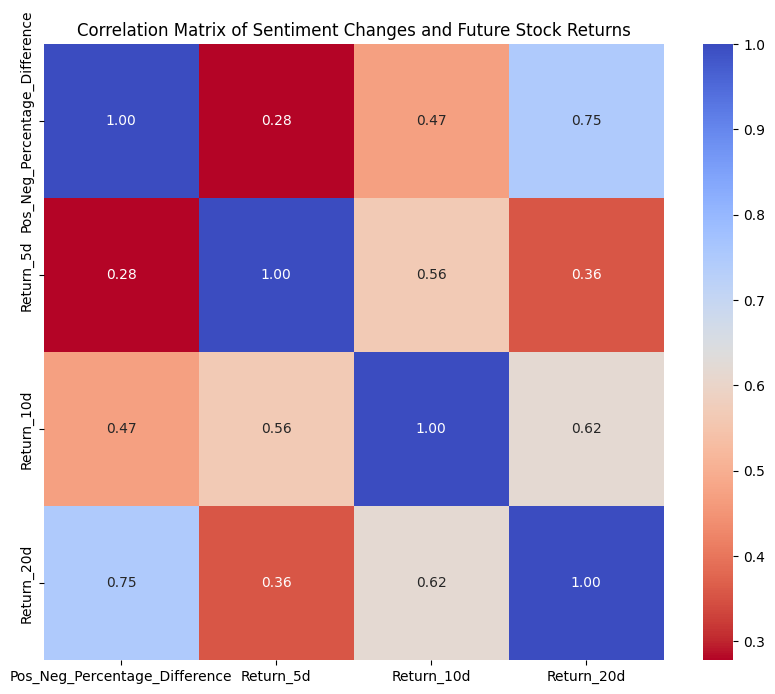

In [29]:
days_to_calculate = [5, 10, 20]  # 1 month is approximated as 20 trading days

for days in days_to_calculate:
    # Calculate future close price
    merged_data_cleaned.loc[:, f'Future_Close_{days}d'] = merged_data_cleaned['Close'].shift(-days)
    # Calculate future returns
    merged_data_cleaned.loc[:, f'Return_{days}d'] = ((merged_data_cleaned[f'Future_Close_{days}d'] - merged_data_cleaned['Close']) / merged_data_cleaned['Close']) * 100


columns_for_analysis = ['Pos_Neg_Percentage_Difference'] + [f'Return_{days}d' for days in days_to_calculate]

correlation_matrix = merged_data_cleaned[columns_for_analysis].corr()
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Correlation Matrix of Sentiment Changes and Future Stock Returns')
plt.show()

#Great visualization to be used for presentation and relationship between 20 day returns and sentiment change stands out most